# Sleep Quality Prediction 

## Sleep Quality Prediction using Wearable Device Data

### Project Overview:
This project aims to predict sleep quality using data from wearable devices. By analyzing various physiological and lifestyle factors such as heart rate variability, body temperature, movement during sleep, caffeine intake, stress levels, bedtime consistency, and light exposure, we can build a machine learning model that provides an estimate of sleep quality.

Objectives of the project
-  Perform exploratory data analysis (EDA) to understand trends and correlations.
-  Train and compare machine learning models to find the best-performing model.
- Use feature engineering & hyperparameter tuning to improve model accuracy.
- Apply SHAP Explainability to interpret model decisions.
- Evaluate residuals and errors for model reliability.

 ## Importing Libraries

In [6]:
# 📌 Importing Required Libraries

# Data Handling & Preprocessing
import numpy as np  # For numerical computations and array operations
import pandas as pd  # For handling structured data (CSV, Excel)
from sklearn.preprocessing import LabelEncoder  # Encodes categorical data into numerical form
from sklearn.preprocessing import StandardScaler  # Standardizes data (zero mean, unit variance)

#  Data Visualization
import matplotlib.pyplot as plt  # Basic 2D plotting (line, bar, scatter, histograms)
import seaborn as sns  # Statistical data visualization with enhanced aesthetics
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting
from matplotlib import cm  # Colormap support for visualizations

#  Statistical Analysis
from scipy.stats import f_oneway  # ANOVA test for comparing multiple group means
import scipy.stats as stats  # Statistical functions for probability distributions and hypothesis testing

#  Machine Learning & Model Training
from sklearn.model_selection import train_test_split, GridSearchCV  # Splitting data, hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regression model
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regression model

#  Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Performance metrics

# Model Explainability
import shap  # SHAP (SHapley Additive exPlanations) for feature importance visualization

# Saving & Loading Models
import joblib  # Efficient model saving and loading
import pickle  # Alternative way to save/load models

# Warnings Handling
import warnings
warnings.filterwarnings('ignore')  # Suppress unnecessary warning messages


## About Libraries
### Data Handling & Preprocessing:
- numpy → Supports numerical computations and array operations.
- pandas → Helps in handling structured data (tables, CSV, Excel files).
- LabelEncoder (from sklearn.preprocessing) → Converts categorical values into numerical labels for ML models.
- StandardScaler (from sklearn.preprocessing) → Standardizes features by removing the mean and scaling to unit variance.
### Data Visualization:
- matplotlib.pyplot → Used for basic 2D plotting (line charts, histograms, bar charts).
- seaborn → High-level visualization library built on top of Matplotlib for better statistical graphs.
- mpl_toolkits.mplot3d.Axes3D → Enables 3D plotting.
- matplotlib.cm → Provides colormap support for visualization.
### Statistical Analysis:
- scipy.stats → Contains statistical functions such as normality tests and probability distributions.
- f_oneway (from scipy.stats) → Performs ANOVA (Analysis of Variance) to compare means across multiple groups.
### Machine Learning & Model Training:
- sklearn.model_selection.train_test_split → Splits data into training and testing sets.
- sklearn.model_selection.GridSearchCV → Performs hyperparameter tuning using grid search.
- sklearn.ensemble.RandomForestRegressor → Implements Random Forest, a powerful ensemble learning algorithm.
- sklearn.ensemble.GradientBoostingRegressor → Implements Gradient Boosting, another ensemble learning method.
### Model Evaluation:
- sklearn.metrics → Provides functions to evaluate model performance:
- mean_absolute_error → Measures average absolute errors.
- mean_squared_error → Measures squared differences between actual and predicted values.
- r2_score → Evaluates how well the model fits the data.
### Model Explanation:
- shap → Used for SHAP (SHapley Additive exPlanations), which helps explain feature importance in ML models.
### Model Saving & Loading:
- joblib → Saves and loads trained models efficiently.
- pickle → Alternative method for saving and loading models.
### Warnings Handling:
- warnings.filterwarnings('ignore') → Suppresses unnecessary warning messages.


## Dataset Description
- The dataset consists of synthetic sleep-related measurements designed to analyze sleep quality based on various physiological and lifestyle factors. Each feature represents a different aspect that may influence sleep patterns and overall sleep quality. 
### Features 
1. Heart Rate Variability (ms)
- Variability in the time intervals between consecutive heartbeats.
- Higher variability generally indicates better cardiovascular and nervous system health.
2. Body Temperature (°C)
- The temperature of the body recorded during sleep.
- Slight drops in temperature are common during deep sleep.
3. Movement During Sleep (count)
- Number of movements detected while sleeping.
- More movement might indicate restlessness or poor sleep quality.
4. Sleep Duration (hours)
- The total number of hours spent asleep.
- Adequate sleep duration is crucial for good health.
5. Sleep Quality Score (0-100)
- A score representing the overall quality of sleep based on various factors.
- Higher scores indicate better sleep quality.
6. Caffeine Intake (mg)
- The amount of caffeine consumed throughout the day.
- Higher intake, especially before bedtime, can negatively impact sleep.
7. Stress Level (0-10)
- A stress index measuring psychological and physiological stress levels.
- High stress levels are often associated with sleep disturbances.
8. Bedtime Consistency (0-1)
- A measure of how consistently an individual follows their bedtime routine.
- Values closer to 1 indicate highly consistent bedtime schedules.
9. Light Exposure Hours (hours)
- The number of hours exposed to light during the day.
- More daytime light exposure is linked to better sleep quality at night.

### Loading dataset

In [122]:
df = pd.read_excel('Sleep_Data.xlsx')

In [124]:
# Printing columns names in the dataset
print('COLUMNS OF DATASET=', df.columns)

COLUMNS OF DATASET= Index(['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
       'Sleep_Duration_Hours', 'Sleep_Quality_Score', 'Caffeine_Intake_mg',
       'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours'],
      dtype='object')


In [126]:
# printing the size of the dataset
print("size of the dataset =",df.shape)


size of the dataset = (6005, 9)


# **Data Cleaning**

**Statistical analysis of the data**

In [15]:
print("Descriptive Statistics for Dataset :")
print(df.describe())

Descriptive Statistics for Dataset :
       Heart_Rate_Variability  Body_Temperature  Movement_During_Sleep  \
count             5404.000000       5428.000000            5405.000000   
mean                70.535471         89.784173               2.015505   
std                 19.562974        220.177067               0.984636   
min                  5.174653         34.579210              -1.313894   
25%                 57.486635         36.222491               1.352985   
50%                 70.613277         36.565241               2.015618   
75%                 83.287216         36.945671               2.667830   
max                147.279332       1000.000000               5.926238   

       Sleep_Duration_Hours  Sleep_Quality_Score  Caffeine_Intake_mg  \
count           5426.000000          5405.000000         5405.000000   
mean               7.037539             4.686134          148.183912   
std                2.458638             2.963092           94.096885   
min     

In [16]:
#missing values in the datasets
print("Missing values in Dataset :")
print(df.isnull().sum())

Missing values in Dataset :
Heart_Rate_Variability    601
Body_Temperature          577
Movement_During_Sleep     600
Sleep_Duration_Hours      579
Sleep_Quality_Score       600
Caffeine_Intake_mg        600
Stress_Level              600
Bedtime_Consistency       600
Light_Exposure_hours      601
dtype: int64


In [17]:
df_clean = df.dropna()

### **Duplicate Detection and Cleaning with Missing Value Imputation in Sleep Dataset**

In [19]:
# Step 1: Check and display the number of duplicate rows before cleaning
initial_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before cleaning: {initial_duplicates}")

# Step 2: Fill missing values
# - Numerical: Fill with median
df['Caffeine_Intake_mg'] = df['Caffeine_Intake_mg'].fillna(df['Caffeine_Intake_mg'].median())

# - Categorical: Fill with mode
df['Stress_Level'] = df['Stress_Level'].fillna(df['Stress_Level'].mode()[0])

# Step 3: Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Step 4: Confirm duplicates are removed
final_duplicates = df_cleaned.duplicated().sum()
print("Duplicates cleaned successfully!" if final_duplicates == 0 else f"{final_duplicates} duplicates still remain.")


Number of duplicate rows before cleaning: 5
Duplicates cleaned successfully!


### **Visualizing Outliers in Sleep Data Using Boxplots**

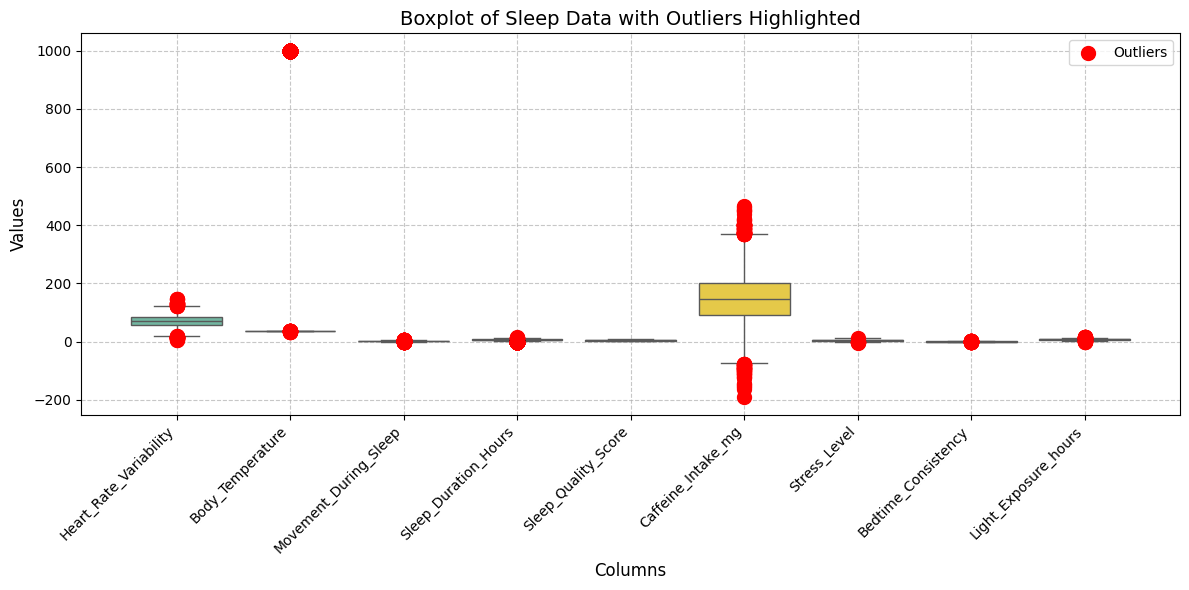

In [21]:
# Your detect_outliers function
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
# Specify numerical columns for outlier detection
# Replace with actual column names from your dataset (e.g., based on df.columns)
# Example: columns = ['Sleep_Duration', 'Heart_Rate', 'Stress_Level']
columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Detect outliers
outliers = detect_outliers(df, columns)

# Create a boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns], orient='v', palette='Set2')

# Overlay outlier points with a distinct marker
for col in columns:
    outlier_values = outliers[col][col]
    if not outlier_values.empty:
        # Plot outliers as red dots
        plt.scatter([columns.index(col)] * len(outlier_values), outlier_values, 
                    color='red', s=100, label='Outliers' if col == columns[0] else "", zorder=5)

# Customize the plot
plt.title('Boxplot of Sleep Data with Outliers Highlighted', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# **Univarite Analysis**
- Univariate Analysis is the examination of a single variable in a dataset.
- It helps in understanding data distribution, central tendency (mean, median, mode), dispersion (variance, standard deviation), and outliers.
- Visualizations such as histograms, box plots, KDE plots, and bar charts are used to analyze each feature individually.

**What is the distribution of sleep duration in the dataset?**

This helps us understand how much time people typically sleep.

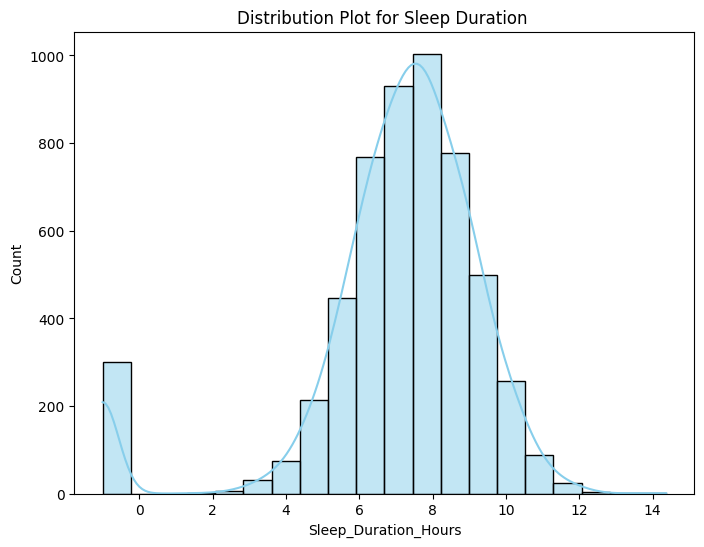

In [24]:
#  Distribution Plot for Sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Sleep_Duration_Hours'], kde=True, color='skyblue', bins=20)
plt.title("Distribution Plot for Sleep Duration ")
plt.show()

**How do stress levels fluctuate over time?**

Understanding how stress is distributed can provide insight into mental well-being.



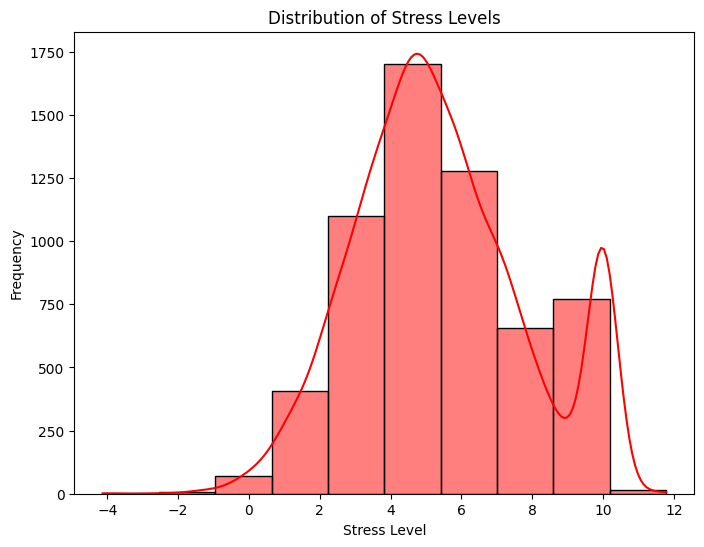

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Stress_Level'], bins=10, kde=True, color='red')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()


**How does heart rate variability (HRV) change over time?**

This shows the variation in heart rate over time, which can indicate stress or overall health.

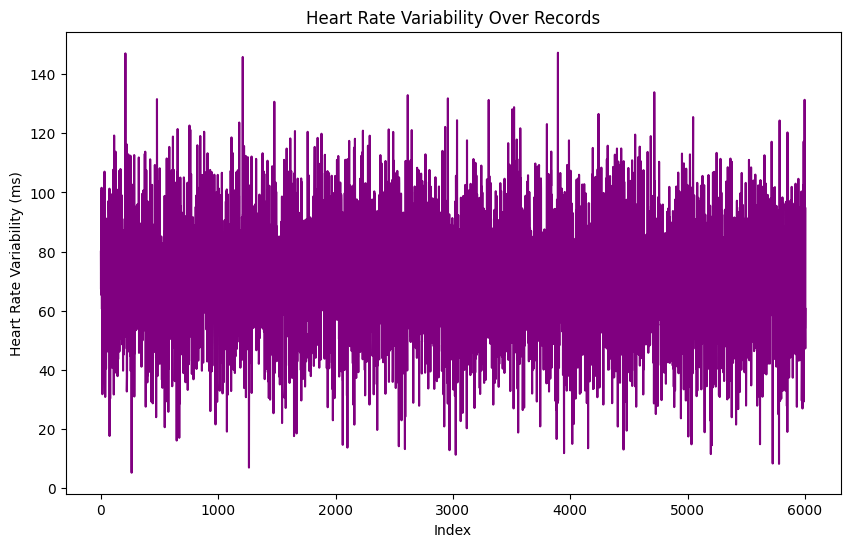

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Heart_Rate_Variability'], color='purple')
plt.title('Heart Rate Variability Over Records')
plt.xlabel('Index')
plt.ylabel('Heart Rate Variability (ms)')
plt.show()

**What is the distribution of movement during sleep?**

Understanding how much people move during sleep can reveal sleep disturbances.


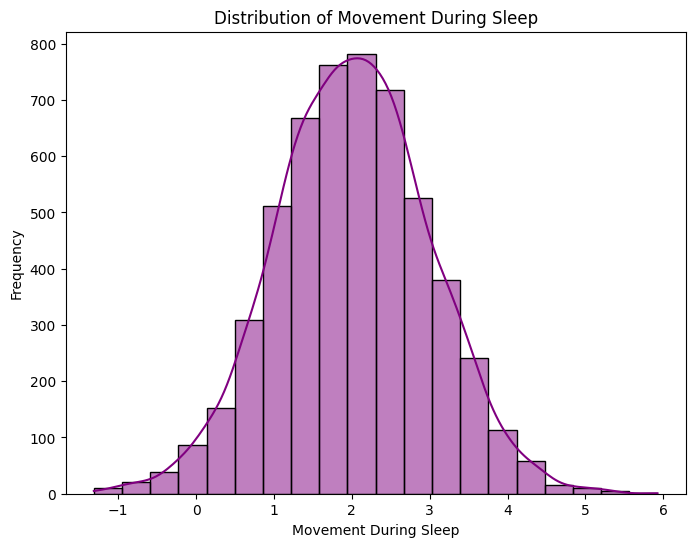

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Movement_During_Sleep'], bins=20, kde=True, color='purple')
plt.title('Distribution of Movement During Sleep')
plt.xlabel('Movement During Sleep')
plt.ylabel('Frequency')
plt.show()

# Bivarient analysis
- Bivariate Analysis is the statistical study of the relationship between two variables in a dataset.
- It helps in understanding correlation, dependencies, and patterns between features.
- Used to determine how one variable affects another (cause-effect relationship).

**Is there a relationship between caffeine intake and sleep quality?**

This explores if consuming more caffeine affects how well people sleep.

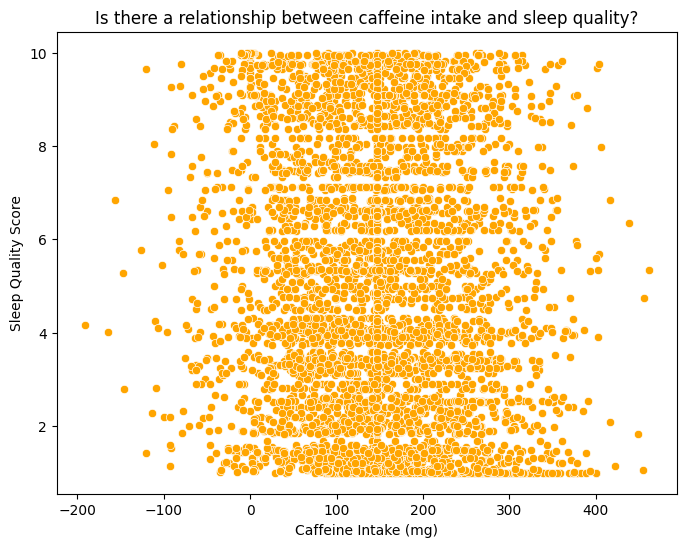

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Caffeine_Intake_mg', y='Sleep_Quality_Score', data=df, color='orange')
plt.title('Is there a relationship between caffeine intake and sleep quality?')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Sleep Quality Score')
plt.show()

 **How does light exposure affect sleep duration?**

This investigates whether more light during the day impacts how long people sleep.


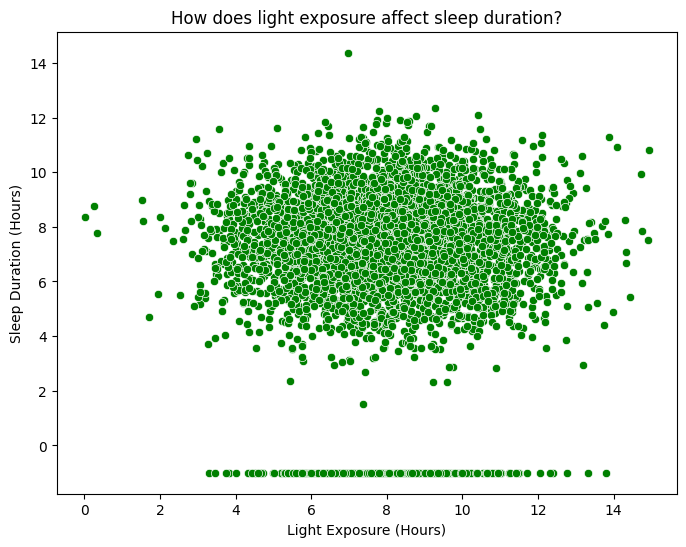

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Light_Exposure_hours', y='Sleep_Duration_Hours', data=df, color='green')
plt.title('How does light exposure affect sleep duration?')
plt.xlabel('Light Exposure (Hours)')
plt.ylabel('Sleep Duration (Hours)')
plt.show()


 **Is body temperature related to sleep quality?**

 Body temperature fluctuations might indicate better or worse sleep quality.

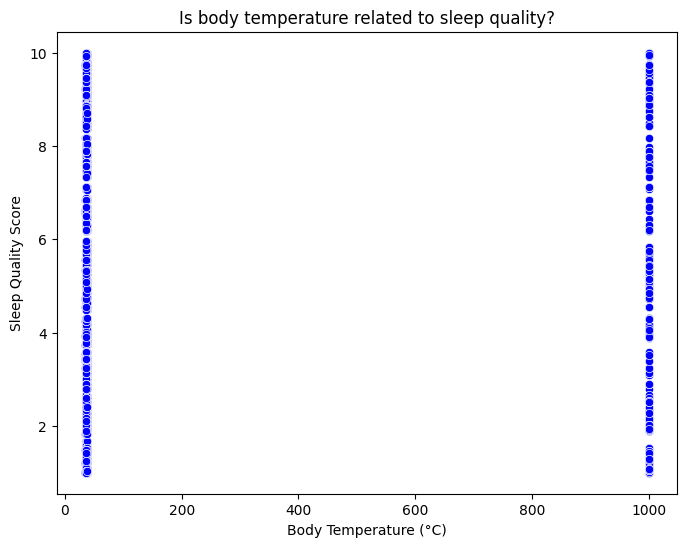

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Body_Temperature', y='Sleep_Quality_Score', data=df, color='blue')
plt.title('Is body temperature related to sleep quality?')
plt.xlabel('Body Temperature (°C)')
plt.ylabel('Sleep Quality Score')
plt.show()


 **How does caffeine intake affect sleep quality by quartiles?**

 This compares sleep quality for different levels of caffeine consumption.





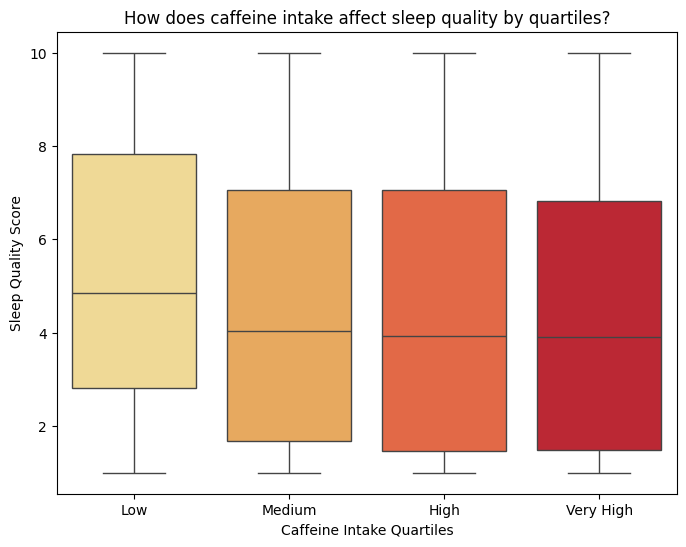

In [39]:
df['Caffeine_Quartile'] = pd.qcut(df['Caffeine_Intake_mg'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Caffeine_Quartile', y='Sleep_Quality_Score', data=df, palette='YlOrRd')
plt.title('How does caffeine intake affect sleep quality by quartiles?')
plt.xlabel('Caffeine Intake Quartiles')
plt.ylabel('Sleep Quality Score')
plt.show()


 **Is there a connection between stress levels and heart rate variability?**

 High stress levels may be linked to less heart rate variability.

**Are there any outliers in the sleep duration hours, and how is the data distributed?**

This visualization helps identify outliers and understand the spread and central tendency of sleep duration within the dataset.

**Are there any outliers in the sleep quality score, and how is the score distributed?**

This visualization helps identify extreme values and provides insights into the median, interquartile range (IQR), and overall distribution of sleep quality in the dataset.

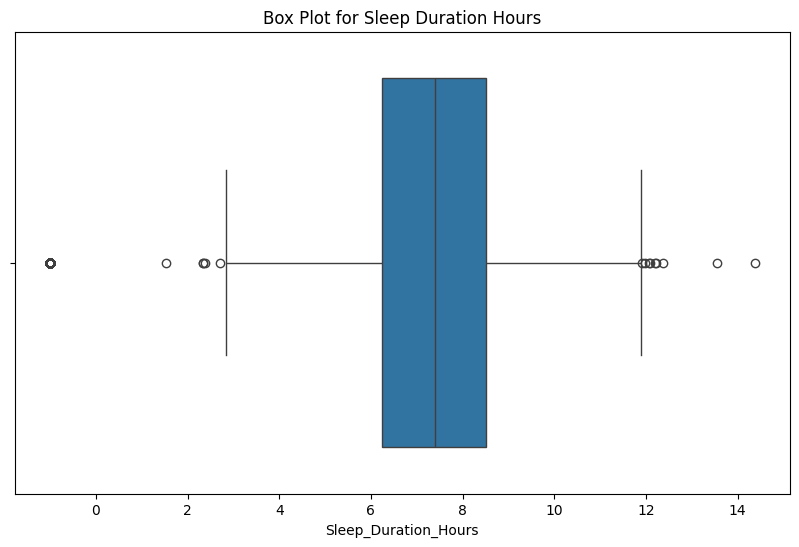

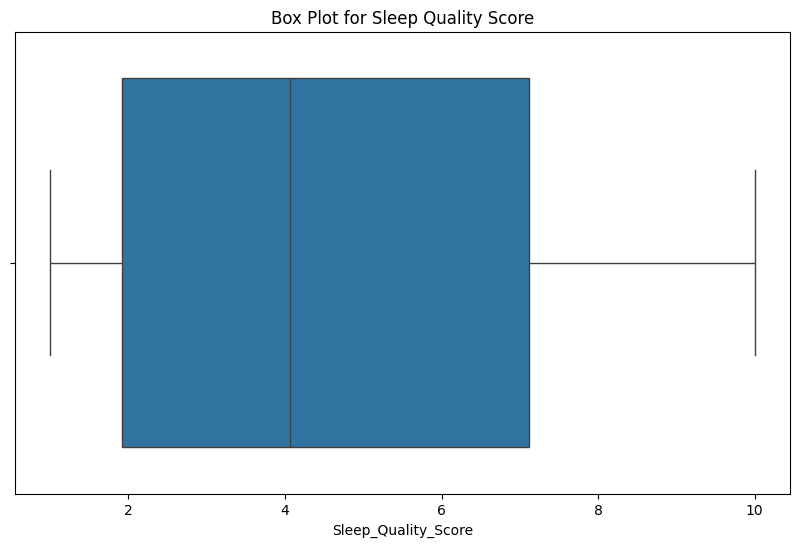

In [42]:
# Outliers: Sleep Duration Hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sleep_Duration_Hours'])
plt.title('Box Plot for Sleep Duration Hours')
plt.show()

# Outliers: Sleep Quality Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sleep_Quality_Score'])
plt.title('Box Plot for Sleep Quality Score')
plt.show()

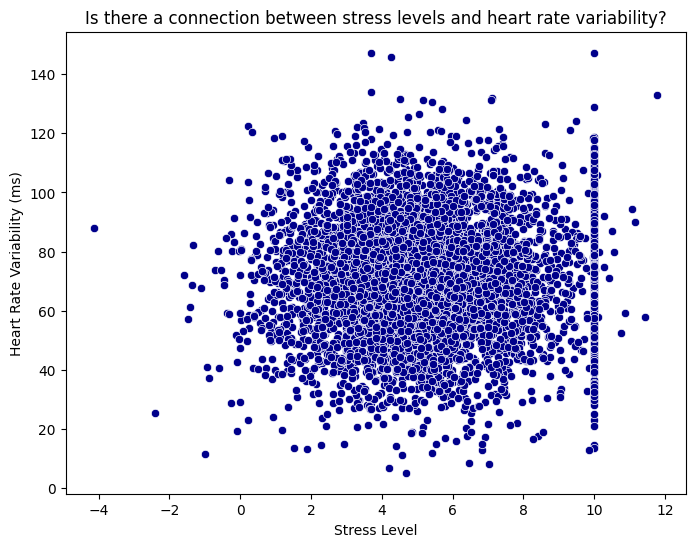

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stress_Level', y='Heart_Rate_Variability', data=df, color='darkblue')
plt.title('Is there a connection between stress levels and heart rate variability?')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate Variability (ms)')
plt.show()

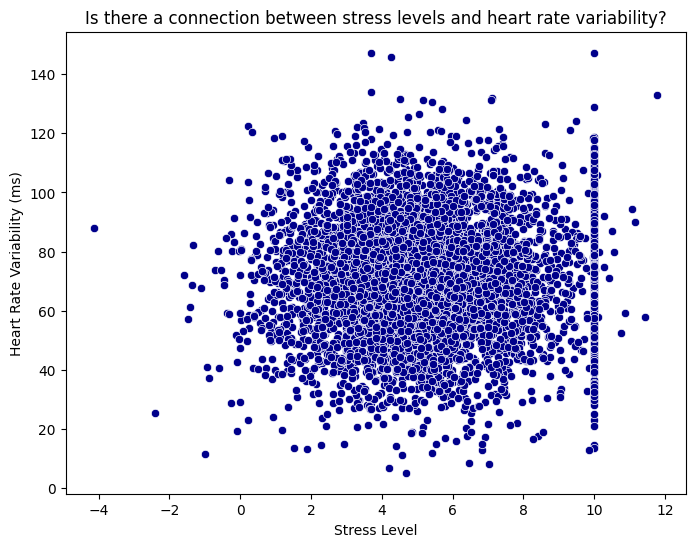

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stress_Level', y='Heart_Rate_Variability', data=df, color='darkblue')
plt.title('Is there a connection between stress levels and heart rate variability?')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate Variability (ms)')
plt.show()

 **Does light exposure impact sleep quality?**

This investigates whether daylight exposure influences how well people sleep.

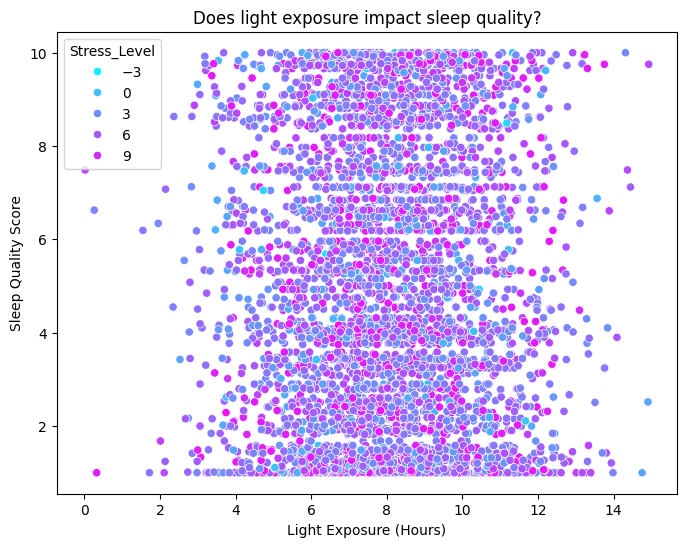

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Light_Exposure_hours', y='Sleep_Quality_Score', data=df, hue='Stress_Level', palette='cool')
plt.title('Does light exposure impact sleep quality?')
plt.xlabel('Light Exposure (Hours)')
plt.ylabel('Sleep Quality Score')
plt.show()


**Does caffeine intake correlate with stress levels?**

Analyzing if caffeine increases stress levels.

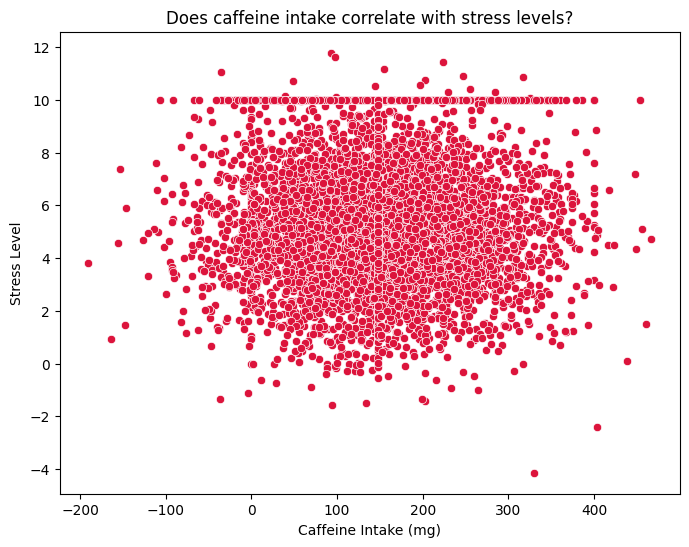

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Caffeine_Intake_mg', y='Stress_Level', data=df, color='crimson')
plt.title('Does caffeine intake correlate with stress levels?')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Stress Level')
plt.show()


**How does sleep duration affect sleep quality, and what role does caffeine intake play in this relationship?**

This plot helps analyze the correlation between sleep duration and sleep quality, while the color gradient reveals the influence of caffeine intake on these two factors.

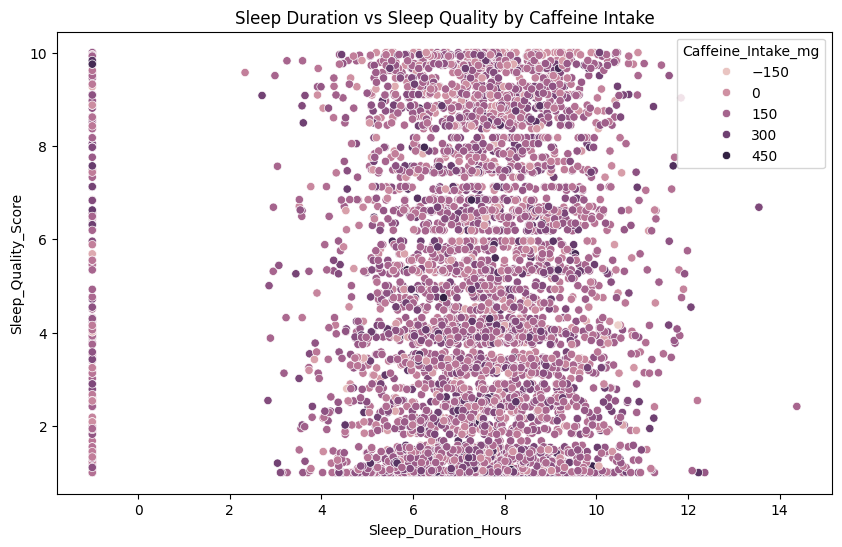

In [50]:
# Sleep Duration vs Quality of Sleep by Caffeine Intake
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Duration_Hours', y='Sleep_Quality_Score', hue='Caffeine_Intake_mg', data=df)
plt.title('Sleep Duration vs Sleep Quality by Caffeine Intake')
plt.show()


# Multivariable Analysis
- Multivariate Analysis examines more than two variables simultaneously to understand their interactions and combined effects.
- Identify hidden patterns in data.
- Discover how multiple factors influence sleep quality.
- Determine feature importance for machine learning models.


In [52]:
#Drop or Convert Non-Numeric Columns: You can drop non-numeric columns like this:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()


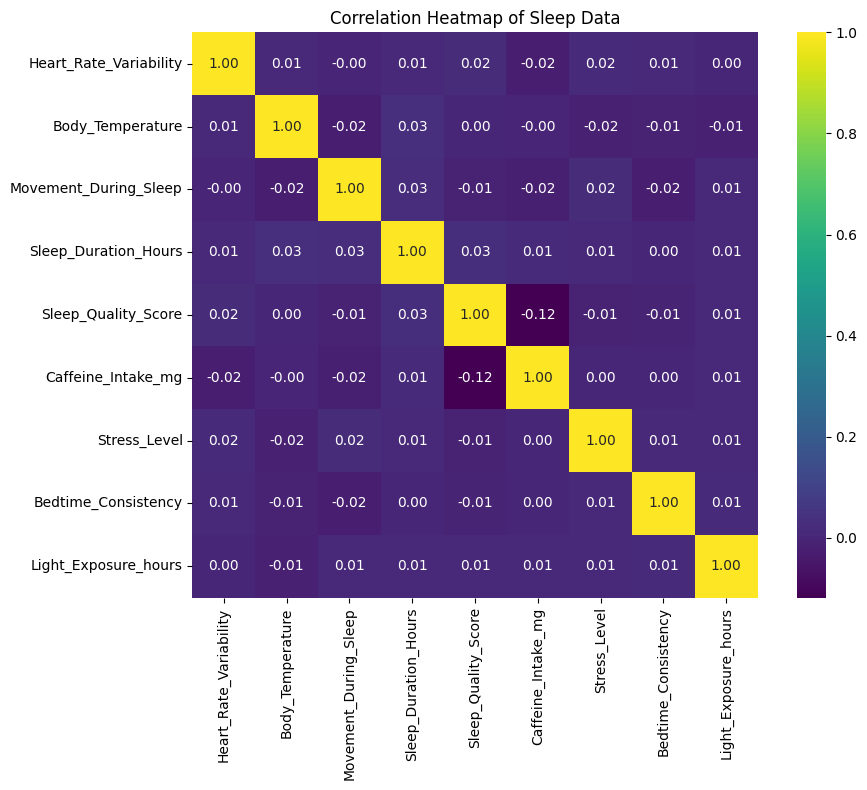

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Sleep Data')
plt.tight_layout()
plt.show()


**How do caffeine intake and stress levels jointly affect sleep quality?**

This visualization helps analyze the combined impact of caffeine consumption and stress on sleep quality, revealing patterns such as whether increased caffeine and stress correlate with poorer sleep quality.


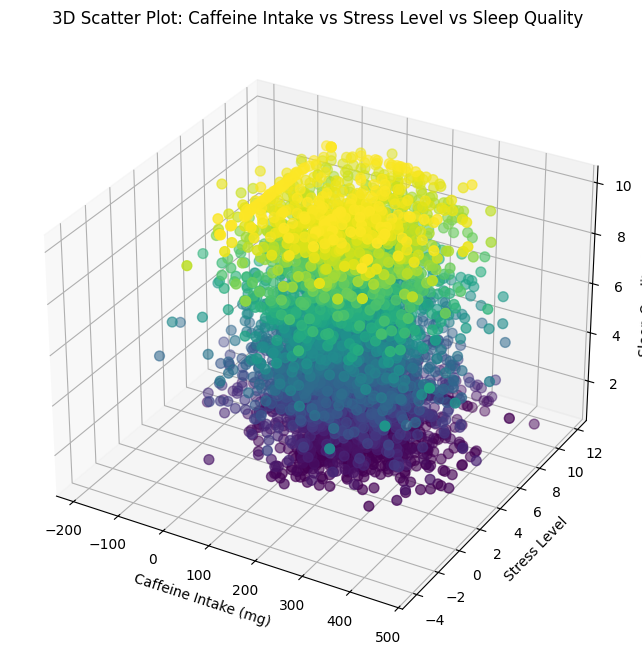

In [55]:
# Select the features for 3D plotting
x = df['Caffeine_Intake_mg']
y = df['Stress_Level']
z = df['Sleep_Quality_Score']

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Labels and title
ax.set_xlabel('Caffeine Intake (mg)')
ax.set_ylabel('Stress Level')
ax.set_zlabel('Sleep Quality Score')
ax.set_title('3D Scatter Plot: Caffeine Intake vs Stress Level vs Sleep Quality')

# Show the plot
plt.show()

**What is the distribution of caffeine intake and stress levels, and how frequently do specific combinations occur?**

This plot reveals how caffeine consumption and stress levels are distributed together, highlighting which combinations are most common and identifying potential patterns in their relationship.


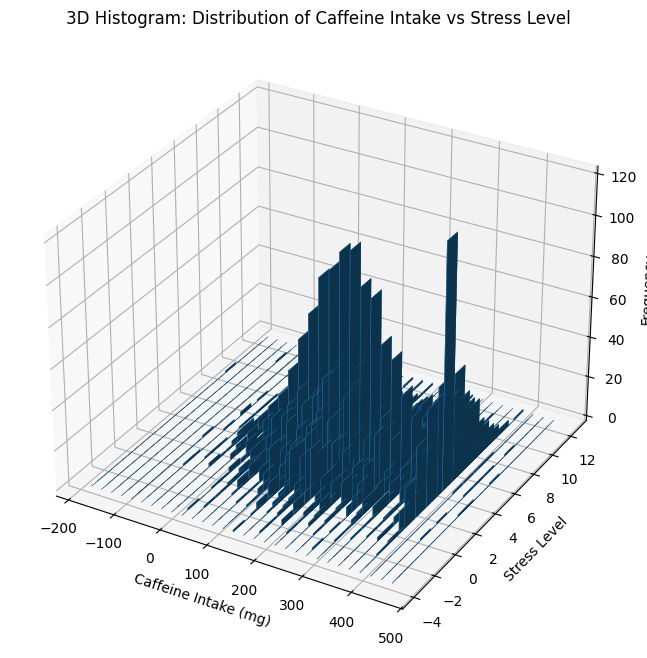

In [57]:
x = df['Caffeine_Intake_mg']
y = df['Stress_Level']
z = df['Sleep_Quality_Score']

# 1. 3D Histogram Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define bins and plot
hist, xedges, yedges = np.histogram2d(x, y, bins=30, range=[[x.min(), x.max()], [y.min(), y.max()]])

# Construct arrays for the x, y coordinates of the bars
xpos, ypos = np.meshgrid(xedges[:-1] + (xedges[1] - xedges[0])/2, yedges[:-1] + (yedges[1] - yedges[0])/2)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Construct arrays for the dx, dy, dz of the bars
dx = dy = np.ones_like(zpos)
dz = hist.flatten()

# Plot the bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')

# Labels and title
ax.set_xlabel('Caffeine Intake (mg)')
ax.set_ylabel('Stress Level')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram: Distribution of Caffeine Intake vs Stress Level')

# Show the plot
plt.show()

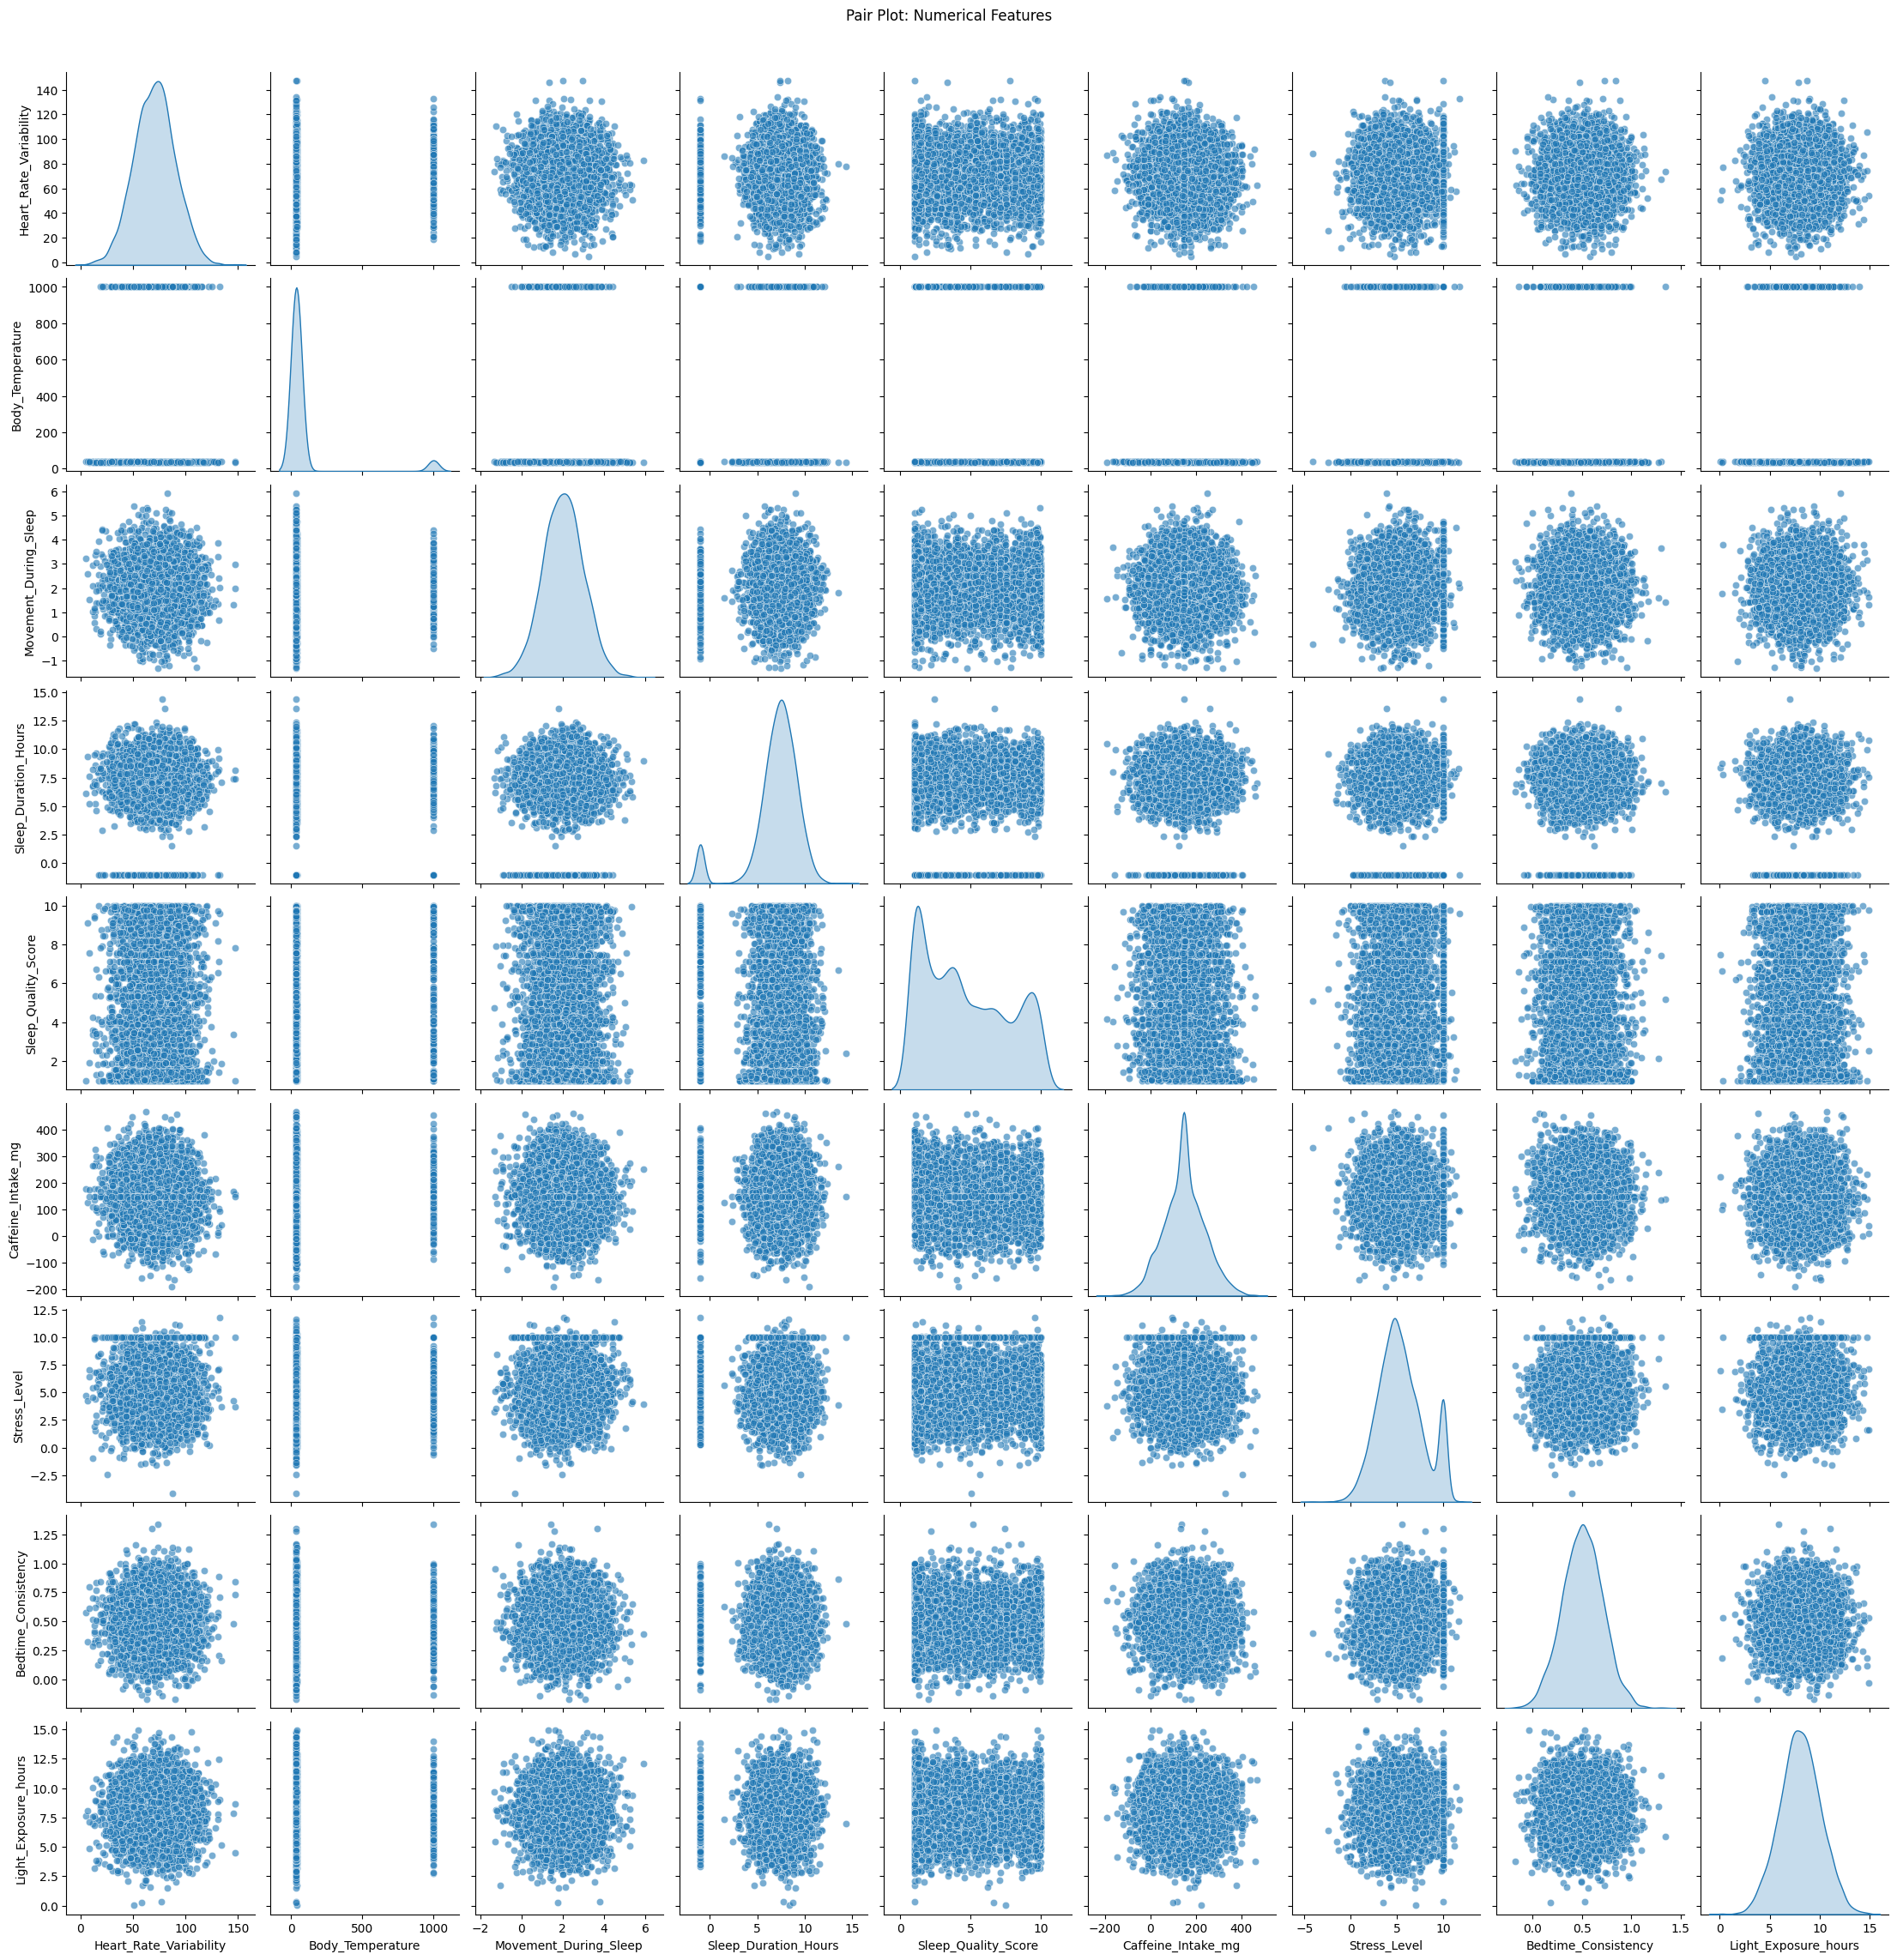

In [58]:
# Pair Plot for Dataset : All numerical columns
numerical_columns= ['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep', 'Sleep_Duration_Hours',
                       'Sleep_Quality_Score', 'Caffeine_Intake_mg', 'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours']
sns.pairplot(df[numerical_columns], diag_kind='kde', kind='scatter', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot: Numerical Features', y=1.02)
plt.show()

**How do multiple health and lifestyle metrics compare across different observations?**

This visualization allows you to compare multiple features


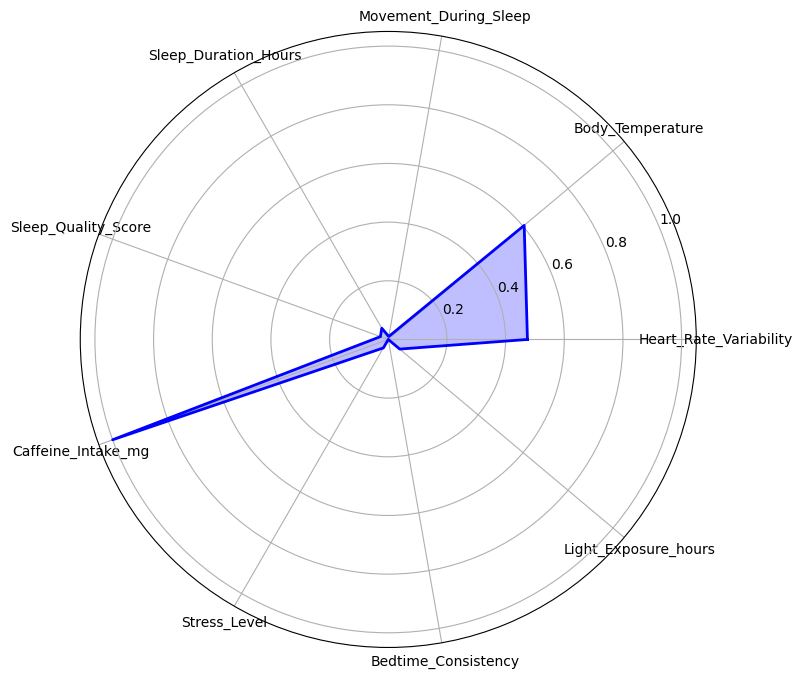

In [60]:
# Select the features to visualize
features = ['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
            'Sleep_Duration_Hours', 'Sleep_Quality_Score', 'Caffeine_Intake_mg',
            'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours']

# Average the dataset for a general comparison
data = df[features].mean().values

# Normalize data to 0-1 range for better visualization
data = (data - data.min()) / (data.max() - data.min())

# Create angles for each axis
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]  # Loop back to the start for a closed circle

# Close the data loop
data = np.concatenate((data, [data[0]]))

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data
ax.fill(angles, data, color='blue', alpha=0.25)  # Filled area
ax.plot(angles, data, color='blue', linewidth=2) # Outline

# Add labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10)


# Show the plot
plt.show()


In [61]:
#timeseries analysis

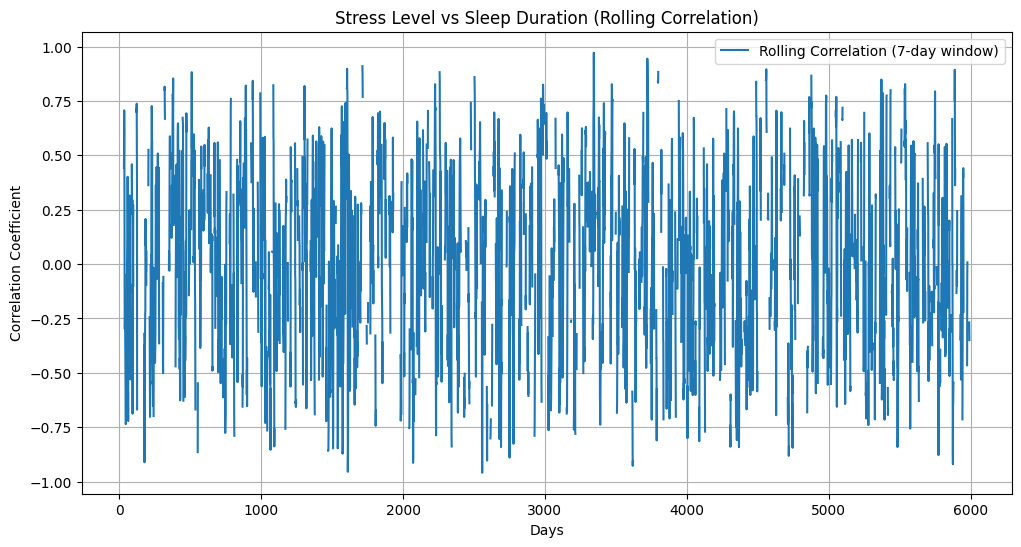

In [62]:
# Rolling correlation between Stress Level and Sleep Duration
rolling_corr = df[['Stress_Level', 'Sleep_Duration_Hours']].rolling(window=7).corr().iloc[0::2, -1].reset_index(drop=True)

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='Rolling Correlation (7-day window)')
plt.title('Stress Level vs Sleep Duration (Rolling Correlation)')
plt.xlabel('Days')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.grid()
plt.show()


# Machine Learning

we will train and compare two machine learning models to predict sleep quality. The goal is to evaluate which model performs better and provides the most accurate predictions.

Models Used
We use two regression models:
1. Random Forest Regressor
- Type: Ensemble Learning (Bagging)

How it Works:
- Creates multiple decision trees on random subsets of data.
- Combines outputs of trees to improve accuracy and reduce overfitting.
- Why Used?
- Handles missing values well
- Works well with both linear and non-linear relationships
- Reduces overfitting using multiple trees
2. Gradient Boosting Regressor
- Type: Ensemble Learning (Boosting)

How it Works:
- Builds trees sequentially, where each tree corrects the errors of the previous one.
- Uses learning rate to control the contribution of each tree.
- Why Used?
- Provides high accuracy
- Works well with complex patterns
- Reduces bias

In [66]:
df.columns

Index(['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
       'Sleep_Duration_Hours', 'Sleep_Quality_Score', 'Caffeine_Intake_mg',
       'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours',
       'Caffeine_Quartile'],
      dtype='object')

## Feature selection

In [68]:
# Feature Selection
features = ['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
            'Sleep_Duration_Hours', 'Caffeine_Intake_mg', 'Stress_Level',
            'Bedtime_Consistency', 'Light_Exposure_hours']
target = 'Sleep_Quality_Score'

X = df_clean[features]
y = df_clean[target]

In [69]:
y.shape

(2321,)

In [70]:
X.shape

(2321, 8)

## Splitting Data into Train & Test Sets:

- train_test_split(X_scaled, y, test_size=0.2, random_state=42)
- 80% training data, 20% testing data

In [72]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling (Normalization):
- Uses StandardScaler() to normalize all numeric features.
- Scaling improves model stability and accuracy.

In [74]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Model

- RandomForestRegressor is used to predict Sleep_Quality_Score.
- The model learns patterns from the training data.

In [76]:
# Now fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## Making Predictions:

- Uses the trained model to predict Sleep_Quality_Score on test data.

In [83]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

## Evaluating the Model:

- Mean Absolute Error (MAE) → Measures average error.
- Mean Squared Error (MSE) → Penalizes larger errors.
- R² Score → Measures how well predictions fit actual values (closer to 1 is better).


In [86]:
# Now evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R^2 Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (for use in MASE calculation)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error: 2.54
Mean Squared Error: 8.81
R² Score: 0.01


#  Hyperparameter Tuning
- Hyperparameters are settings that control the learning process of a machine learning model. Unlike model parameters (which are learned during training), hyperparameters must be set before training.

In [90]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [92]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=1)

In [93]:
# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


- Performing hyperparameter tuning using Grid Search Cross-Validation (GridSearchCV) to find the best combination of hyperparameters for a Random Forest Regressor.

In [96]:
# Predictions
y_pred = best_model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MASE calculation
y_test_series = y_test.reset_index(drop=True)  # ensure Series format
naive_forecast = y_test_series.shift(1)
naive_mae = mean_absolute_error(y_test_series[1:], naive_forecast[1:])
mase = mae / naive_mae if naive_mae != 0 else np.nan

# Results
print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Scaled Error (MASE): {mase:.4f}")
print(f"R² Score: {r2:.4f}")


Evaluation Metrics:
Mean Squared Error (MSE): 8.6516
Mean Absolute Error (MAE): 2.5336
Mean Absolute Scaled Error (MASE): 0.7489
R² Score: 0.0326



Feature Importances:
                  Feature  Importance
4      Caffeine_Intake_mg    0.211200
0  Heart_Rate_Variability    0.124915
2   Movement_During_Sleep    0.121565
6     Bedtime_Consistency    0.114059
3    Sleep_Duration_Hours    0.109611
5            Stress_Level    0.108385
7    Light_Exposure_hours    0.106348
1        Body_Temperature    0.103917


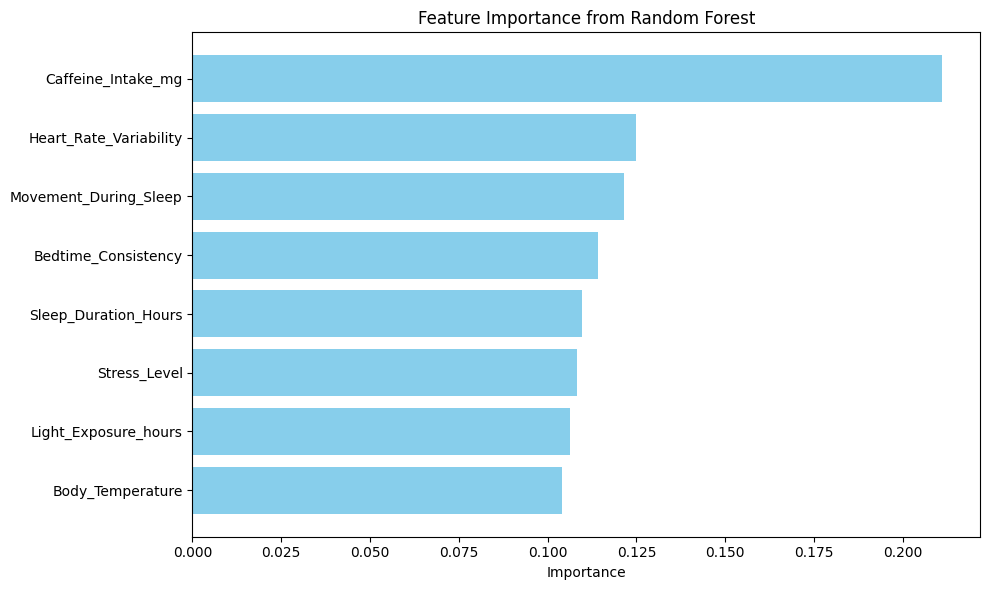

In [98]:
# Extract feature importances
importances = best_model.feature_importances_
feature_names = features

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display as a table
print("\nFeature Importances:")
print(feature_importance_df)

# Optional: Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Create GradientBoosting model and show comparisn between two model

In [118]:
# Assume these values are already calculated:
# mse, mae, mase, r2 -> for Random Forest
# mse_gbr, mae_gbr, mase_gbr, r2_gbr -> for Gradient Boosting

# 📊 Model Comparison Table
comparison_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "MASE", "R² Score"],
    "Random Forest": [mse, mae, mase, r2],
    "Gradient Boosting": [mse_gbr, mae_gbr, mase_gbr, r2_gbr]
})

print("\n🔍 Model Performance Comparison:\n")
print(comparison_df.to_string(index=False))


🔍 Model Performance Comparison:

  Metric  Random Forest  Gradient Boosting
     MSE       8.651591           8.434654
     MAE       2.533626           2.508767
    MASE       0.748886           0.741538
R² Score       0.032576           0.056834


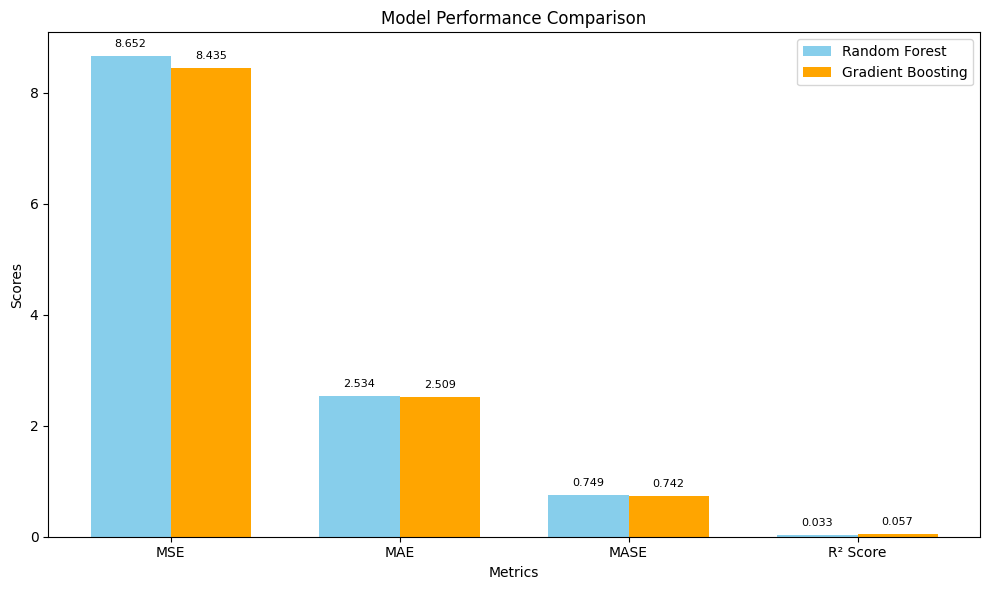

In [120]:
# 📈 Plotting Comparison Graph
metrics = comparison_df["Metric"]
rf_scores = comparison_df["Random Forest"]
gbr_scores = comparison_df["Gradient Boosting"]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, gbr_scores, width, label='Gradient Boosting', color='orange')

# Axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

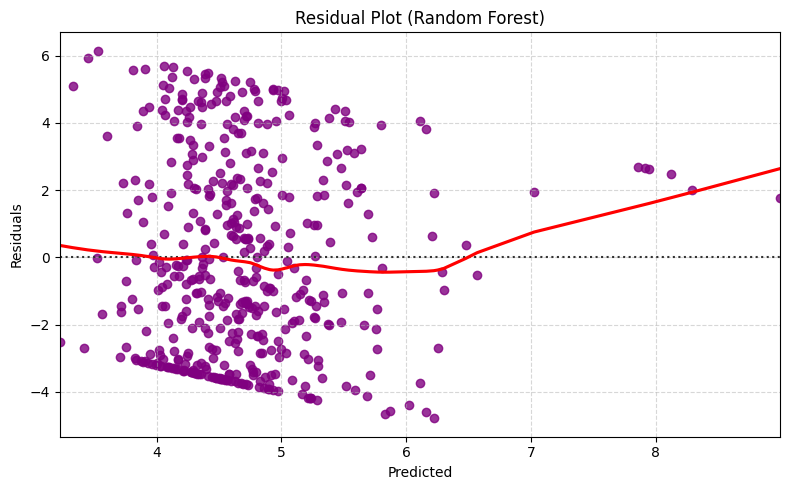

In [103]:
# Residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='purple', line_kws={'color': 'red'})
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

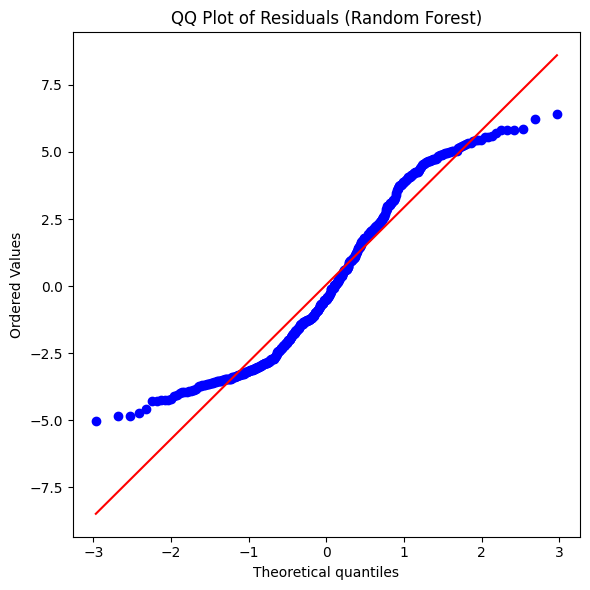

In [105]:
# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (Random Forest)")
plt.tight_layout()
plt.show()

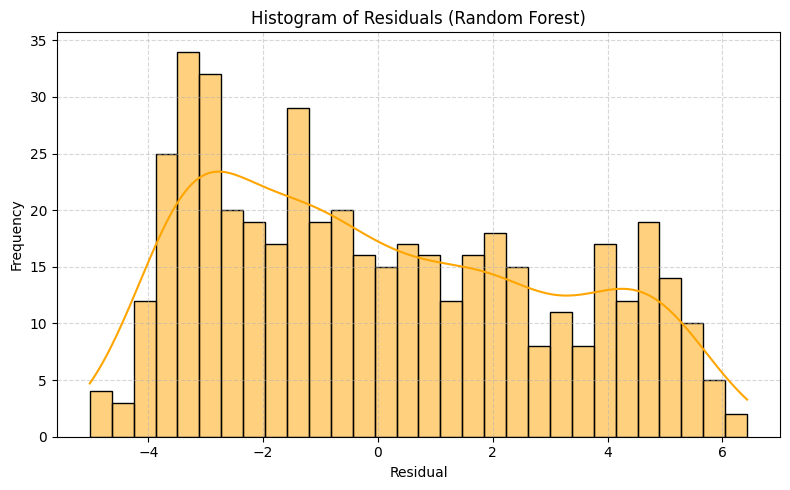

In [107]:
# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title("Histogram of Residuals (Random Forest)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Save the  best Model:

- The trained model is saved as 'sleep_quality_model.pkl' using joblib.dump().
- This allows reuse without retraining.


In [110]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']